In [72]:
import pandas
beargrass = pandas.read_csv('guadelupe.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1935,148000
1,1936,107000
2,1939,3820
3,1940,7520
4,1941,15400


In [73]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to inverse transform log x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

In [74]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

In [256]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = -scipy.stats.skew(sample)
#sample_skew  = 0.00001 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

plotting = weibull_pp(sample)

x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

NameError: name 'beargrass' is not defined

In [257]:

sample_mean  = 4.0289
sample_stdev = 7144
sample_skew  = -0.507 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta
    
x = []; ycdf = []
#xlow = (1); xhigh = (12) ; howMany = 100
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

NameError: name 'sample' is not defined

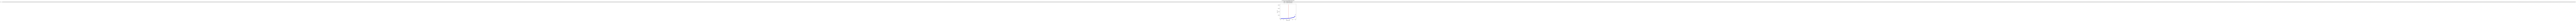

In [254]:
import matplotlib.pyplot # the python plotting library
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(1-antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [255]:
%reset -f
import pandas
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
import matplotlib.pyplot # the python plotting library
# log and antilog
def loggit(x):  # A prototype function to log10 transform x
    return(math.log10(x))
def antiloggit(x):  # A prototype function to inverse transform log10 x
    return(10**(x))
# plotting position functions
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort(reverse=True) # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp
# LP3-core model
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

In [262]:
observations = pandas.read_csv('guadelupe.txt')  #Reading a .csv file
#observations.head()
sample = observations['Peak'].apply(loggit).tolist() # put the log peaks into a list
plotting = weibull_pp(sample)

In [263]:
# all in log space
model_mean  = 4.0289
model_stdev = 0.7144
model_skew  = -0.507 # scipy.stats.skew(sample)
model_alpha = 4.0/(model_skew**2)
model_beta  = numpy.sign(model_skew)*math.sqrt(model_stdev**2/model_alpha)
model_tau   = model_mean - model_alpha*model_beta

xmodel = []; ymodelcdf = []
#xlow = (1); xhigh = (12) ; howMany = 100
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    xmodel.append(xlow + i*xstep)
    yvalue = 1.0 - gammacdf(xlow + i*xstep,model_tau,model_alpha,model_beta)
    ymodelcdf.append(yvalue) 

In [264]:
#gammacdf(2,model_tau,model_alpha,model_beta)
sample.sort()
#xmodel.sort()

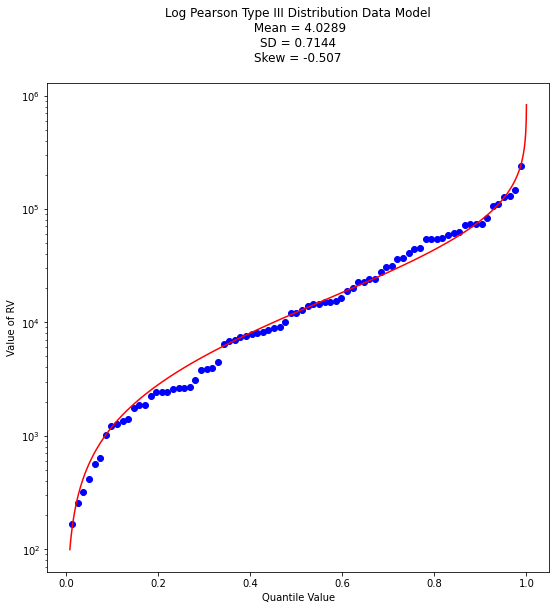

In [273]:
# reverse transform the peaks, and the data model peaks
psample = []
for i in range(len(sample)):
    psample.append(antiloggit(sample[i]))
x = [] #null list for plotting
for i in range(len(xmodel)):
    x.append(antiloggit(xmodel[i]))
myfigure = matplotlib.pyplot.figure(figsize = (9,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.yscale('log')
matplotlib.pyplot.scatter(plotting, psample ,color ='blue') 
matplotlib.pyplot.plot(ymodelcdf, x, color ='red')
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str((model_mean)) + "\n"
mytitle += "SD = " + str((model_stdev)) + "\n"
mytitle += "Skew = " + str((model_skew)) + "\n"
#mytitle += "Mean = " + str(antiloggit(model_mean)) + "\n"
#mytitle += "SD = " + str(antiloggit(model_stdev)) + "\n"
#mytitle += "Skew = " + str(1-antiloggit(model_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
#matplotlib.pyplot.axis([max(ymodelcdf), min(ymodelcdf),max(x), min(x) ])
matplotlib.pyplot.show()

In [274]:
print(model_tau)
print(model_alpha)
print(model_beta)
sample_tau = 6.847045956607495
sample_alpha = 15.561235406478918
sample_beta = -0.18110040000000002
argument = loggit(5000)
print(gammacdf(argument,6.847045956607495,15.561235406478918,-0.18110040000000002))

6.847045956607495
15.561235406478918
-0.18110040000000002
0.7015211776872157


In [279]:
# quantile finder
from scipy.optimize import newton

def f(x):
    sample_tau = 6.847045956607495
    sample_alpha = 15.561235406478918
    sample_beta = -0.18110040000000002
    quantile = 0.9000
    argument = loggit(x)
#    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    gammavalue = gammacdf(argument,model_tau,model_alpha,model_beta)
    return gammavalue - quantile

myguess =  50
print(newton(f, myguess))

1211.6832209512233


In [64]:
x

[10.0,
 12.882495516931343,
 16.595869074375607,
 21.379620895022324,
 27.542287033381662,
 35.48133892335755,
 45.708818961487516,
 58.8843655355589,
 75.85775750291836,
 97.72372209558107,
 125.89254117941675,
 162.18100973589299,
 208.92961308540407,
 269.1534803926914,
 346.73685045253166,
 446.683592150963,
 575.4399373371566,
 741.3102413009177,
 954.992586021436,
 1230.268770812381,
 1584.893192461114,
 2041.7379446695295,
 2630.2679918953813,
 3388.441561392024,
 4365.158322401661,
 5623.413251903491,
 7244.359600749898,
 9332.543007969914,
 12022.644346174131,
 15488.166189124795,
 19952.62314968879,
 25703.957827688646,
 33113.112148259075,
 42657.95188015926,
 54954.08738576248,
 70794.57843841374,
 91201.08393559097,
 117489.75549395304,
 151356.12484362072,
 194984.45997580455,
 251188.6431509582,
 323593.6569296281,
 416869.3834703355,
 537031.7963702533,
 691830.9709189363,
 891250.9381337459,
 1148153.6214968818,
 1479108.3881682071,
 1905460.7179632483,
 2454708.915685